# 문제 06
iris.csv파일을 읽고 SepalLength,SepalWidth,PetalLength, Name열로 PetalWidth 를 예측하는  ANN 모델을 생성하세요.

In [1]:
from tensorflow.keras import layers, models
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.python.keras.utils import np_utils  # to_categorical
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='relu'))
    model.compile(loss='mse', optimizer='sgd')
    return model

In [4]:
def one_hot_encoding():
    enc = OneHotEncoder(sparse_output=False)
    enc.fit(iris['Name'].values.reshape(-1, 1))
    encoded = enc.transform(iris['Name'].values.reshape(-1,1))
    df = pd.DataFrame(encoded, columns=enc.categories_[0])
    return df

In [5]:
onehot_name = one_hot_encoding()

In [6]:
iris = pd.concat([iris, onehot_name], axis = 1)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [7]:
Nin = 6
Nh = 5
Nout = 1
model = ANN_seq_func(Nin, Nh, Nout)

In [8]:
X = iris.loc[:, ('SepalLength', 'SepalWidth','PetalLength','Iris-setosa', 'Iris-versicolor', 'Iris-virginica')]

In [9]:
Y = iris.loc[:,'PetalWidth']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [11]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
history = model.fit(
    X_train,
    Y_train, 
    epochs=100, 
    batch_size = 100, 
    validation_split=0.2, 
    verbose = 0
)
performace_test = model.evaluate(X_test, Y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performace_test))


1/1 [==============================] - 0s 36ms/step - loss: 0.1276

Test Loss -> 0.13


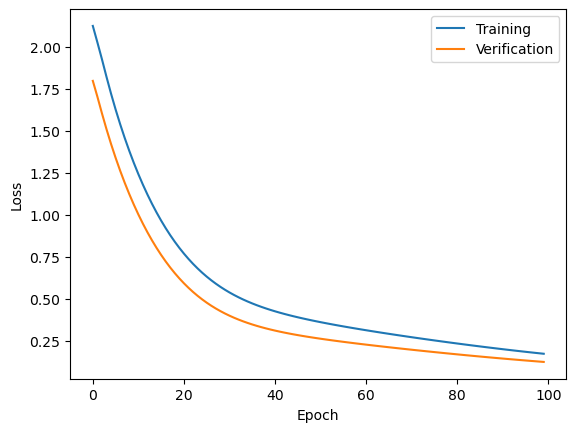

In [13]:
history = history.history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Verification'], loc=0)
plt.show()